# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import missingno as msno



## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]

- Lifecycle of 4,500 Clouds
- Simulated with the Weather Forecast Model ICON
- Located above the Atlantic Ocean during the formation of Hurricane [Paulette](https://zoom.earth/storms/paulette-2020/)

### Background
A common method in cloud research is the application of cloud-tracking tools to study cloud life cycles and trajectories. The underlying data typically come from satellite imagery or from numerical weather prediction models. Clouds, however, are ephemeral, ever-changing objects, constantly shifting in shape and form. Tracking such transient features is therefore a challenging task.

The temporal resolution of satellite imagery is limited to a best case of around 5 minutes. Numerical models are not restricted in the same way, but they are limited by the amount of data that can realistically be written and stored. For cloud studies, this temporal resolution becomes a severe bottleneck: short-lived clouds may appear and disappear between the standard model output intervals of 15 to 60 minutes.

To overcome this limitation, the Leibniz Institute for Tropospheric Research ([TROPOS](https://www.tropos.de)) is developing - within the EU-funded CleanCloud project — the software Targo (Targeted Output). Targo enables cloud tracking in simulations at extremely high temporal resolution of around 30 seconds.

### Method
Targo is attached as a plugin to the weather forecast model ICON via the CoMIn interface. It requests meteorological fields at every model time step (typically 30–60 seconds) and performs cloud tracking using the community software tobac. At every cloud position, additional meteorological variables are requested, allowing for a comprehensive characterization of each cloud. This approach provides highly resolved cloud data at minimal storage cost.

### Casestudy
The study object is Hurricane Paulette from September 2020. A hurricane is one of the most extreme meteorological phenomena on our planet. It is characterized by a strong pressure depression (the hurricane eye), surrounded by a ring of convective clouds, intense precipitation, and thunderstorms.

We applied our new cloud-tracking method to Paulette for a 48-hour period on 7–8 September 2020. From this simulation, we obtained 4,500 tracks of convective clouds. 
An example of identified cloud objects and an overfiew or the cloud trajectories can be found in the following figures.

![Identified Cloud Objects](Cloud_Features.png) ![Cloud Tracks](Tracks.png) 


### Data Structure
A cloud may appear in multiple frames (time steps) of the simulation. Corresponding cloud detections across consecutive frames are linked together to form cells. In other words, a cell represents the time series of an individual cloud.

Our dataset consists of these cells.

Each cell is stored as an individual dataframe, containing a time axis and a set of cloud-related features.
A sample of the dataset is included in this repo. 

In [53]:
path = "../../cells"
files = glob.glob(os.path.join(path, "cell_*.csv"))

cells = [pd.read_csv(csv) for csv in sorted(files)]
cells[0]

,frame,feature,time,latitude,longitude,feature_orig,cell,qr_L00,qr_L01,qr_L02,...,w_L49,w_L50,iwp_L00,cin_ml_L00,cape_ml_L00,lwp_L00,rain_gsp_rate_L00,tqc_L00,tqi_L00,area_m2
0,0,100,2020-09-07 06:00:00,14.806766,-35.143897,100,1,0.0,0.0,0.0,...,-0.027386,-3.784426e-14,8.997624,2.379005,301.260924,30.319000,0.022330,7.648070,0.080619,78400000.0
1,1,217,2020-09-07 06:00:30,14.806831,-35.143116,99,1,0.0,0.0,0.0,...,-0.028771,-6.503367e-14,9.319070,NaN,NaN,30.215622,0.022330,7.701143,0.085909,78400000.0
2,2,331,2020-09-07 06:01:00,14.808311,-35.138376,98,1,0.0,0.0,0.0,...,-0.029712,-8.767103e-14,9.627407,NaN,NaN,29.948774,0.022330,7.712930,0.094982,109760000.0
3,3,446,2020-09-07 06:01:30,14.809712,-35.134903,99,1,0.0,0.0,0.0,...,-0.030557,-1.090713e-13,9.917784,NaN,NaN,29.579189,0.022330,7.732792,0.088996,109760000.0
4,4,559,2020-09-07 06:02:00,14.810908,-35.132386,95,1,0.0,0.0,0.0,...,-0.031306,-1.290282e-13,10.190824,NaN,NaN,29.110476,0.022330,7.760998,0.097003,109760000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,9310,2020-09-07 06:40:00,14.881211,-35.082662,52,1,0.0,0.0,0.0,...,-0.019610,-2.679252e-13,6.778517,21.413516,344.518660,3.936661,0.000294,2.768072,0.063065,78400000.0
81,81,9429,2020-09-07 06:40:30,14.883007,-35.082569,51,1,0.0,0.0,0.0,...,-0.018928,-2.693820e-13,6.954454,NaN,NaN,3.687701,0.000216,2.625233,0.072249,78400000.0
82,82,9552,2020-09-07 06:41:00,14.885756,-35.082512,54,1,0.0,0.0,0.0,...,-0.018304,-2.705569e-13,7.130416,NaN,NaN,3.438641,0.000161,2.474338,0.083106,78400000.0
83,83,9673,2020-09-07 06:41:30,14.890571,-35.082552,55,1,0.0,0.0,0.0,...,-0.017707,-2.715746e-13,7.304951,NaN,NaN,3.192270,0.000120,2.316999,0.094732,78400000.0


The length of each time series reflects the lifetime of the corresponding cloud. Overall, a strong variation in cloud lifetimes can be observed. Most clouds are short-lived, but some reach lifetimes of several hours. The number of clouds decreases exponentially with increasing lifetime.

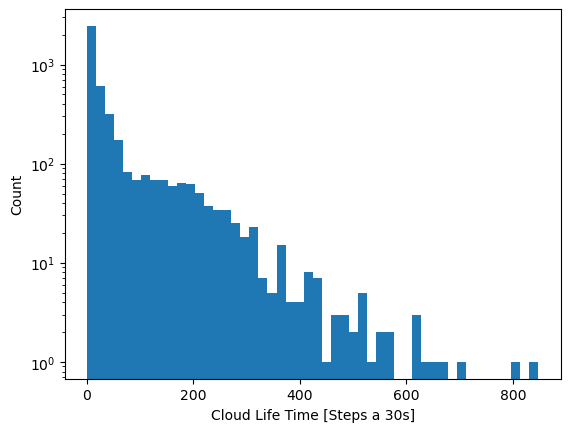

In [54]:
length = [len(cell) for cell in cells]

# Histogram plotten
plt.hist(length, bins=50)
plt.xlabel("Cloud Life Time [Steps a 30s]")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

### Features

The dataset contains a broad set of variables describing the dynamical, thermodynamical, and microphysical state of each cloud. Hydrometeor mixing ratios (rain, cloud water, ice, snow, and graupel) are provided as full vertical profiles, enabling a detailed characterization of cloud phase and precipitation processes. Additional profiles of water vapor, air density, and vertical velocity capture the environmental and dynamical structure controlling cloud evolution. Integrated column quantities such as liquid and ice water path, as well as CAPE and CIN, provide information on the convective environment. Geolocation, time, and cloud area complement the physical variables and allow the reconstruction of cloud trajectories and life cycles. Together, these features form a comprehensive basis for analyzing cloud behavior and identifying the key factors that govern cloud lifetime and development.


Many variables are provided as vertical profiles (≈50 model levels). For technical purposes, these appear as separate columns in the dataset, but conceptually they represent a single physical feature (e.g., the cloud water mixing ratio profile). Therefore, the dataset contains several hundred individual columns but only about 20 distinct feature groups.


| **Feature Group**                              | **Description**                                                                                                           | **Why It Matters for Cloud Characterization**                                                                      |                                                                                                                                                                                                                                     |
| ---------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cell Metadata**               | `frame`, `time`, `cell`, `feature`, `feature_orig`                                                                        | Provide temporal indexing, object identifiers, and bookkeeping information for tracking cloud evolution over time. |                                                                    |
| **Geolocation**                                | `latitude`, `longitude`                                                                                                   | Horizontal position of the cloud in geographic coordinates.                                                        |                                                                   |
| **Hydrometeor Profiles** (Level-based L00–L49) | `qr_Lxx` (rain), `qc_Lxx` (cloud water), `qi_Lxx` (ice), `qs_Lxx` (snow), `qg_Lxx` (graupel) — each as a vertical profile | Vertical distribution of hydrometeors within the cloud column.                                                     | Key to characterizing cloud microphysics: condensation processes, precipitation onset, mixed-phase processes, and storm intensity. Profiles are crucial for distinguishing shallow vs. deep convection and cloud phase transitions. |
| **Moisture & Density Profiles**                | `qv_Lxx` (water vapor), `roh_Lxx` (air density)                                                                           | Show vertical moisture availability and density structure inside the cloud.                                 | Control buoyancy, convection strength, cloud growth potential, entrainment/detrainment processes, and environmental stability.                                                                                                      |
| **Vertical Velocity Profile**                  | `w_Lxx`                                                                                                                   | Updraft and downdraft structure of the cloud.                                                                      | One of the strongest predictors for convective strength, cloud lifetime, precipitation, lightning potential, and cloud-top height evolution.                                                                                        |
| **Integrated/Column Variables**                | `iwp_L00` (ice water path), `lwp_L00` (liquid water path), `tqc_L00`, `tqi_L00`                                           | Vertically integrated hydrometeor content over the cloud column.                                                   | Useful to derive cloud optical properties, precipitation potential, cloud mass budgets, and identifying deep vs. shallow moist structures.                                                                                          |
| **Convective Environment Indicators**          | `cape_ml_L00`, `cin_ml_L00`                                                                                               | Convective Available Potential Energy & Convective Inhibition.                                                     | Explain environmental conditions influencing cloud initiation, growth, and suppression—important for understanding why some clouds develop into deep convection and others die early.                                               |
| **Surface & Precipitation Variables**          | `rain_gsp_rate_L00`                                                                                                       | Grid-scale precipitation rate.                                                                                     | Helps diagnose cloud maturity stage, precipitation onset, and the role of microphysics in convective evolution.                                                                                                                     |
| **Cloud Geometry**                             | `area_m2`                                                                                                                 | Horizontal cloud area at the detection level.                                                                      | Indicator of cloud size, growth rate, cloud-merging processes, and relationships between cloud dimension and lifetime.                                                                                                              |


## Handling Missing Values

Since the dataset is derived entirely from a numerical weather prediction model, it does not contain classical missing values in the sense of incomplete or interrupted measurements. Model output is generated deterministically at every time step, ensuring that the physical state variables and hydrometeor fields are always available without gaps.

An exception applies to the diagnostic variables CAPE and CIN. These quantities are not computed at every model time step but only at intervals of approximately five minutes. As a result, the dataset contains gaps for these variables between the diagnostic output times. In order to provide continuous time series for the cloud cells, the intermediate values of CAPE and CIN can be filled using linear interpolation, which is adequate given the relatively slow temporal variability of these environmental fields compared to the cloud evolution.

<Axes: >

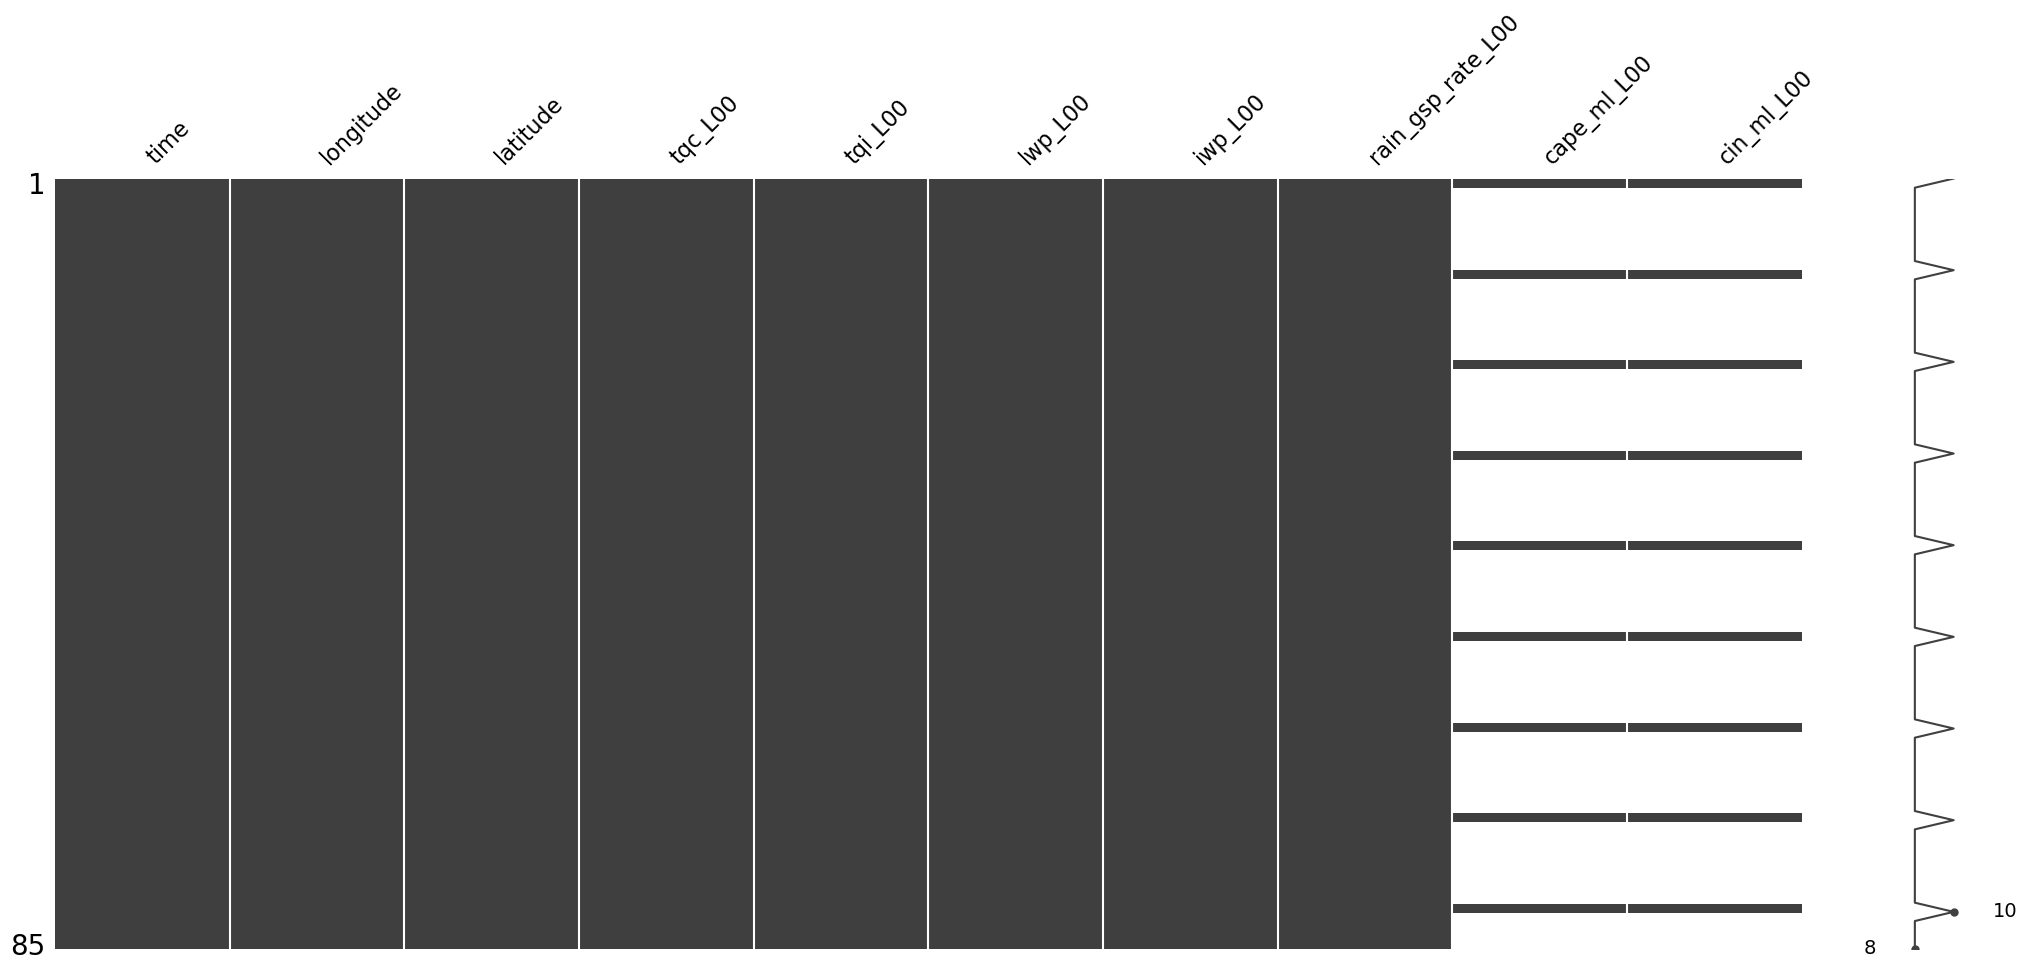

In [55]:
msno.matrix(cells[0][['time', 'longitude', 'latitude','tqc_L00','tqi_L00','lwp_L00','iwp_L00','rain_gsp_rate_L00', 'cape_ml_L00', 'cin_ml_L00']])

In [56]:
for cell in cells:
    for var in ['cape_ml_L00', 'cin_ml_L00']:
        if var in cell.columns:
            # Interpolate linearly in time
            cell[var] = cell[var].interpolate(method='linear')


## Feature Distributions

Because the dataset is structured as a list of individual cloud-cell DataFrames, feature analysis cannot be performed directly on a single unified table. Each DataFrame represents the complete time series of one cloud, and clouds differ strongly in their lifetime and number of time steps. To obtain comparable statistics across clouds, we aggregate each cell into a cloud-level summary representation.

For every cloud, all time-dependent features are reduced using statistical summaries. The resulting summary DataFrame provides a compact but expressive representation of the physical characteristics of each cloud and is well suited for feature distribution analysis and correlation studies.


In [58]:
DT_SECONDS = 30  # model / Targo timestep

summaries = []

for cell_id, cell in enumerate(cells):
    s = {"cell_id": cell_id}

    # 1) lifetime
    s["lifetime_s"] = len(cell) * DT_SECONDS

    # 2) max(qx) for each hydrometeor class (profiles L00–L49)
    hydro_prefixes = ["qc_", "qi_", "qs_", "qg_", "qr_"]
    for pref in hydro_prefixes:
        cols = [c for c in cell.columns if c.startswith(pref)]
        if cols:
            s[f"max_{pref[:-1]}"] = cell[cols].to_numpy().max()
        else:
            s[f"max_{pref[:-1]}"] = np.nan  # falls nicht vorhanden

    # 3) max(tqi, tqc, lwp, iwp)
    for var in ["tqi_L00", "tqc_L00", "lwp_L00", "iwp_L00"]:
        s[f"max_{var.replace('_L00','')}"] = cell[var].max() if var in cell.columns else np.nan

    # 4) mean(cin, cape)
    for var in ["cin_ml_L00", "cape_ml_L00"]:
        s[f"mean_{var.replace('_ml_L00','')}"] = cell[var].mean() if var in cell.columns else np.nan

    # 5) max(rain_rate)
    rain_var = "rain_gsp_rate_L00"
    s["max_rain_rate"] = cell[rain_var].max() if rain_var in cell.columns else np.nan

    # 6) max(area)
    area_var = "area_m2"
    s["max_area_m2"] = cell[area_var].max() if area_var in cell.columns else np.nan


    # 7) max(w)
    updraft_var = "area_m2"
    s["max_updraft"] = cell[updraft_var].max() if updraft_var in cell.columns else np.nan

    summaries.append(s)

df_cloud = pd.DataFrame(summaries)
df_cloud.to_csv('summary.csv')

To understand the physical structure and variability of the cloud population, we inspect the distributions of all summary features. The histograms reveal that most variables are highly skewed and exhibit heavy-tailed characteristics, which is typical for convective cloud populations.

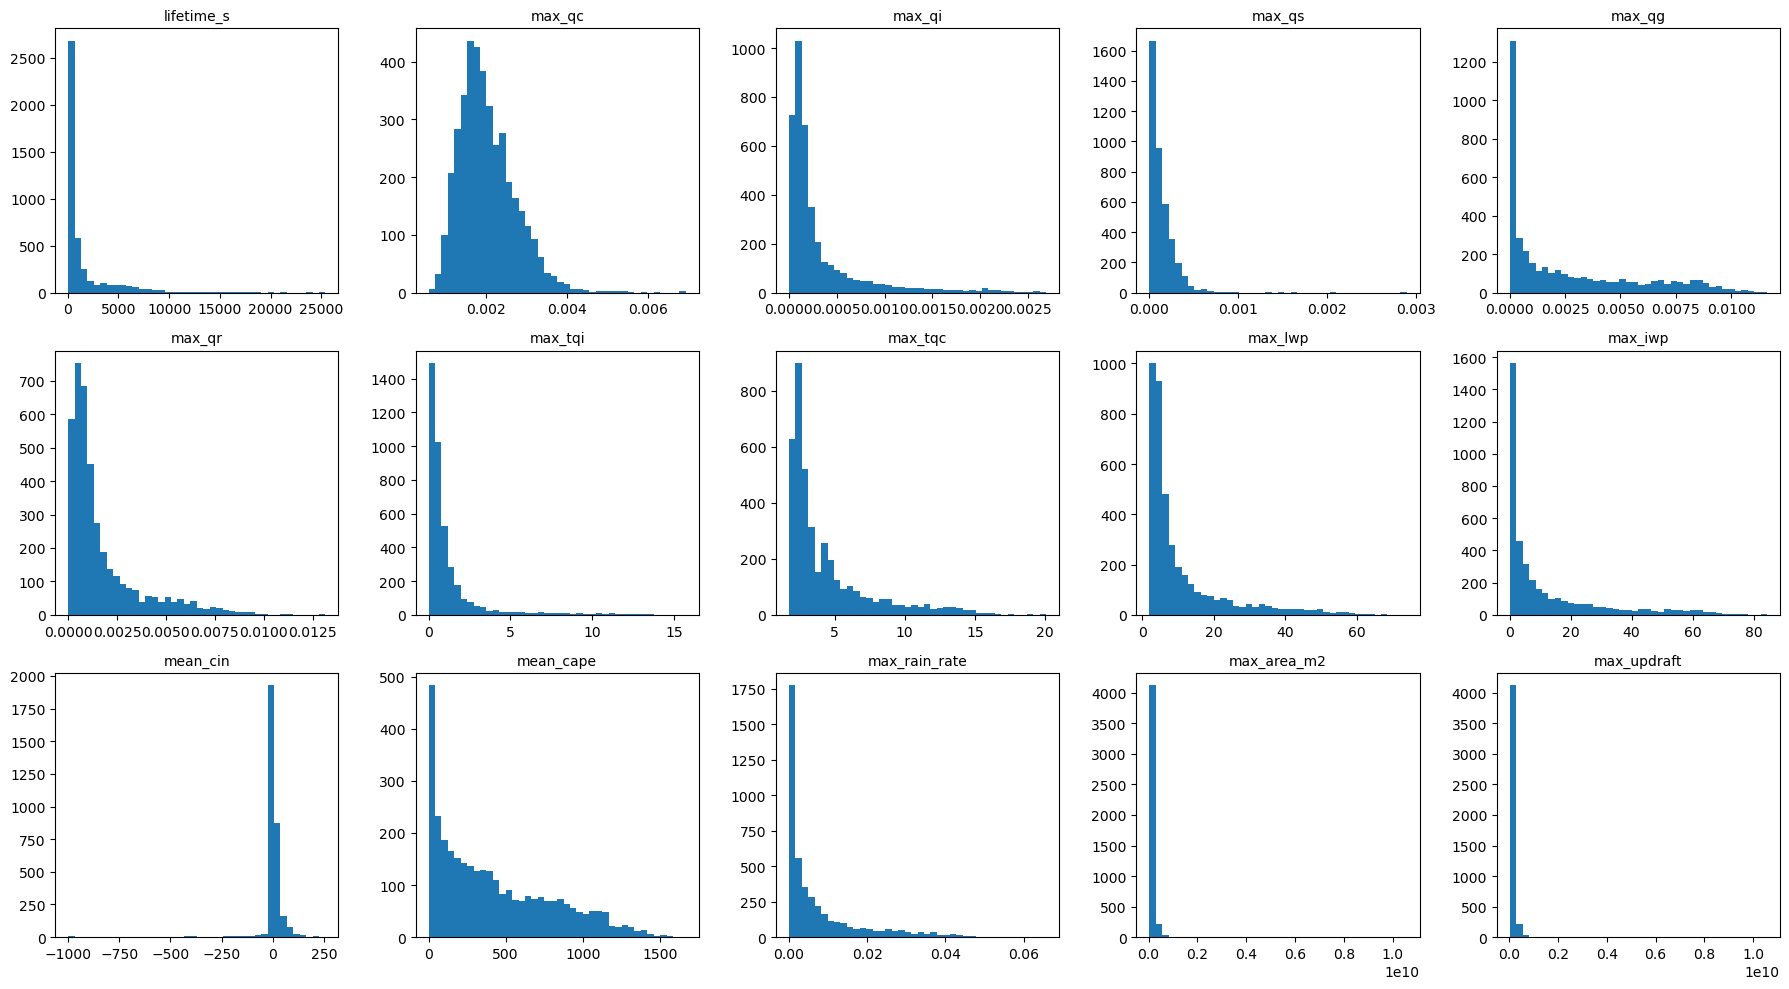

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

# Load your summary data
df = df_cloud

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# ---- Configuration ----
n_rows = 3
n_cols = 5
n_plots = n_rows * n_cols

# If there are more than 15 features, take the first 15
features_to_plot = num_cols[-n_plots:]

# ---- Plotting ----
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(n_rows, n_cols)

for idx, col in enumerate(features_to_plot):
    r = idx // n_cols
    c = idx % n_cols

    ax = fig.add_subplot(gs[r, c])
    ax.hist(df[col].dropna(), bins=40)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

### Lifetime

The distribution of cloud lifetimes is extremely right-skewed.
Most clouds exist only for a short period, while only a few long-lived clouds reach lifetimes of several thousand seconds. This introduces a strong lifetime imbalance, which has important implications for machine-learning models: models will naturally learn to favor short lifetimes unless the imbalance is compensated.

### Hydrometeor Maxima

All hydrometeor maxima (cloud water, rain, ice, snow, graupel) have heavy-tailed distributions.
Liquid-phase quantities (qc, qr) exhibit moderate peaks, whereas ice-phase quantities (qi, qs, qg) are strongly skewed toward zero. This reflects the fact that most clouds in the dataset are shallow or weakly convective, while only a few reach deep convection and strong mixed-phase processes.

### Column-Integrated Water Paths

The maximal values of LWP, IWP, TQC, and TQI also show pronounced right-skewness.
Most clouds contain only small integrated water loads, while a few convective cores accumulate very large amounts of condensate. These rare high-value cases correspond to the most intense convective cells.

### Environmental Variables

CAPE varies over a relatively broad range but remains moderately right-skewed.
CIN, in contrast, is narrowly distributed around zero, which is typical for maritime convective environments such as hurricanes. CAPE and CIN change slowly in space and time compared to cloud dynamics.

### Rain Rate

The maximum rain rate is strongly dominated by very small values.
Only a few clouds produce significant precipitation, which means that the dataset contains a strong rain-rate imbalance. As with lifetime, this will bias a machine-learning model toward predicting weak or no rain unless handled carefully.

### Cloud Area

Cloud area is highly right-skewed: many clouds are very small, and only a few are extremely large.
These large clouds correspond to organized convective structures or eyewall-related activity.

## Possible Biases

The dataset exhibits several structural biases that may affect the performance and generalization ability of machine-learning models.

1. Lifetime bias (class imbalance)
The most prominent bias arises from the strong imbalance between short-lived and long-lived clouds.
The majority of clouds exist only for a few minutes, while long-lived convective clouds are comparatively rare.
A machine-learning model trained on this distribution is therefore likely to perform better on short-lived clouds and may systematically underestimate the characteristics or evolution of long-lived convective systems.

2. Bias in dynamical intensity
Because strong convective updrafts occur primarily in the less frequent long-lived clouds, the dataset’s imbalance may also bias the model toward weaker dynamical structures. This can lead to underrepresentation of deep convection and extreme events such as strong precipitation bursts or rapidly intensifying cells.

3. Spatial bias within the hurricane structure
Clouds embedded in the hurricane’s eyewall or rainbands may systematically differ from those in the outer environment. If certain regions of the storm contain many more cloud objects, the model could implicitly learn location-specific patterns rather than general physical relationships.


## Correlations



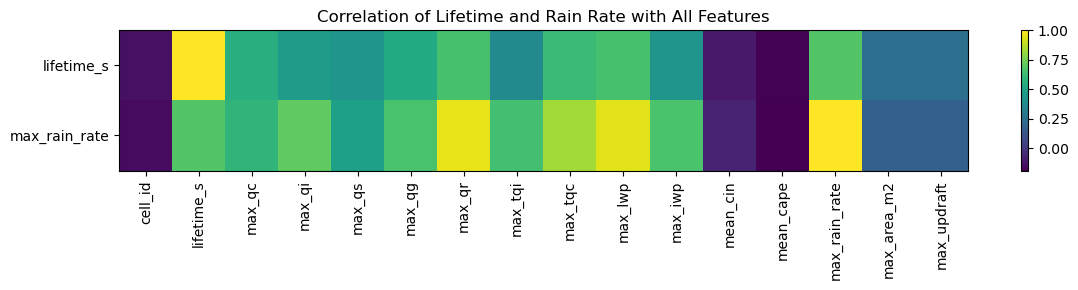

In [64]:
df = df_cloud

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Targets
targets = ["lifetime_s", "max_rain_rate"]

# Compute full correlation matrix
corr = df[num_cols].corr()

# Extract only the two target rows
corr_target = corr.loc[targets]

# Plot heatmap (single plot)
plt.figure(figsize=(12, 3))
plt.imshow(corr_target, aspect="auto")
plt.xticks(range(len(corr_target.columns)), corr_target.columns, rotation=90)
plt.yticks(range(len(corr_target.index)), corr_target.index)
plt.colorbar()
plt.title("Correlation of Lifetime and Rain Rate with All Features")
plt.tight_layout()
plt.show()

The correlation heatmap provides a focused comparison of how all cloud-summary features relate to the two target quantities of interest:

**(1) cloud lifetime and (2) maximum rain rate.**

Several physically meaningful patterns become visible:

### 1. Long-lived clouds tend to produce more precipitation

There is a clear positive correlation between cloud lifetime and maximum rain rate.
This indicates that clouds which survive for longer periods also tend to grow deeper and reach the stronger dynamical and microphysical states required for precipitation formation.
Short-lived clouds rarely produce rain, which aligns well with physical intuition.

### 2. Ice-phase processes are more predictive of rain than warm-phase water

Among the hydrometeor maxima:

- max qi (ice water)
- max qg (graupel)

show stronger correlations with rain rate than max qc (cloud water).

This reflects that mixed-phase and glaciated clouds are far more efficient at producing precipitation than purely warm clouds.
Ice hydrometeors accelerate precipitation processes through riming, aggregation, and melting, all of which enhance rainfall at the surface.

The strong correlation between rain rate and LWP/TQC is partly structural:

Rain water (qr) contributes directly to LWP, so high LWP/TQC values accompany high rain rates by definition.

Graupel also shows elevated correlations.

This is physically consistent because ice-phase processes are essential for efficient precipitation formation.

### 3. What controls cloud lifetime?

The variables most strongly correlated with lifetime are:

- max tqc / max qc → clouds with more cloud water tend to persist longer
- max qi / qs / qg → but deep ice clouds are not strictly required; some long-lived clouds remain mostly warm
- max rain rate → long-lived clouds eventually produce precipitation

This suggests that:

Long lifetimes are associated with clouds that maintain a large condensate reservoir, but they do not necessarily need to be strongly glaciated.

This is physically consistent: sustained condensation and moist inflow can maintain long-lived warm clouds, while deeper convective towers eventually transition to mixed phase and produce rainfall.

### 4. Weak or absent relationships

Several features show little to no correlation with either target:

CAPE and CIN

Both environmental parameters exhibit almost no correlation with cloud lifetime or precipitation intensity.

This is expected in a hurricane simulation, where:

- CAPE varies slowly and is spatially smooth
- Local dynamics (e.g., convergence, vorticity) dominate cloud development
- CIN is generally weak or near zero in maritime tropical environments

Area and updraft

Both show only modest correlations.
Large area does not guarantee longevity or strong precipitation, and maximum updraft alone is not a reliable predictor once averaged over the full cloud duration.

### 5. Interpretation Caveat

These correlations are derived from the summary features:
each cloud is represented by max/mean values, not full vertical or temporal profiles.

This provides a very good overview of which physical processes matter most, but:

The importance of feature groups may shift when using full profile data in a sequence-to-sequence baseline model.

Profile-level feature selection or dimensionality reduction (e.g., PCA per variable group) may reveal additional predictive structure that is hidden in the max/mean summaries.

Further experimentation with the baseline model will be required to determine the most informative features for sequence forecasting.